In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Tuple

import plot_settings
import plot_utils

In [2]:
from importlib import reload

In [71]:
reload(plot_utils), reload(plot_settings)

(<module 'plot_utils' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_utils.py'>,
 <module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>)

In [72]:
results = pd.read_csv("../political_compass_results.csv")
results = results[results.prompt_name == "neutral"]  # start with the basic prompts
results.head()

,Unnamed: 0,model,prompt_name,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
0,0,gpt2,neutral,0.250,0.105,0.00,-4.05,0.50,4.26
12,12,bert-base-uncased,neutral,-0.125,0.000,-0.25,-4.36,0.00,4.36
24,24,bert-large-uncased,neutral,0.125,0.150,0.00,-4.26,0.25,4.56
36,36,facebook/bart-base,neutral,0.000,0.000,0.00,-4.36,0.00,4.36
48,48,facebook/bart-large,neutral,0.000,0.000,0.00,-4.36,0.00,4.36


In [73]:
forward_scores = {row.model: (row.forward_economic_score, row.forward_social_score) for row in results.itertuples()}

In [74]:
reload(plot_settings)

<module 'plot_settings' from '/Users/adelaidechambers/Desktop/CSE599 J/course_project/Ophiuchus/figures/plot_settings.py'>

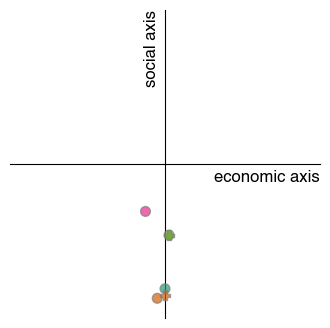

In [75]:
%matplotlib inline
plot_utils.make_conventional_plot(
    forward_scores, 
    ["gpt2", "bert-base-uncased", "bert-large-uncased", "roberta-base", "roberta-large", "meta-llama/Llama-2-7b-hf"],
    max_range=5
)
plt.show()

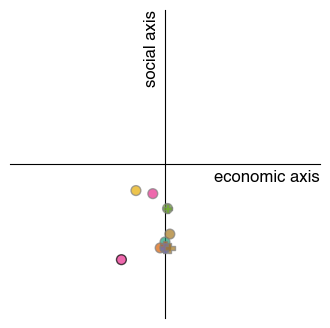

In [76]:
plot_utils.make_conventional_plot(
    forward_scores, max_range=8
)
plt.show()

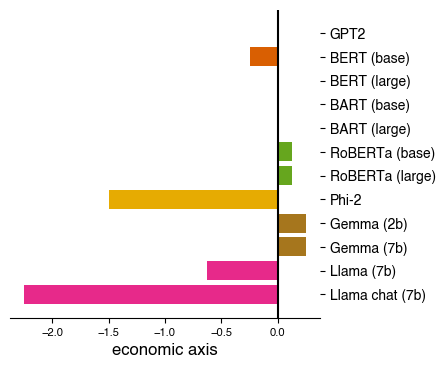

In [82]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: forward_scores[m][0] for m in forward_scores}, metric="economic_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

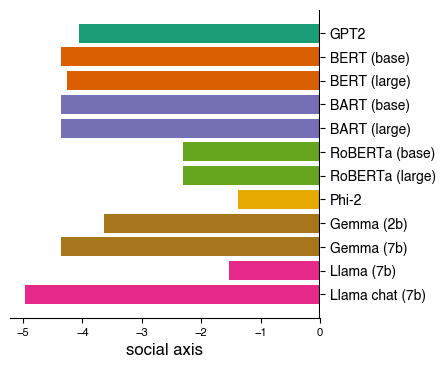

In [83]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: forward_scores[m][1] for m in forward_scores}, metric="social_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

In [84]:
combo_scores = {row.model: (row.average_economic_score, row.average_social_score) for row in results.itertuples()}

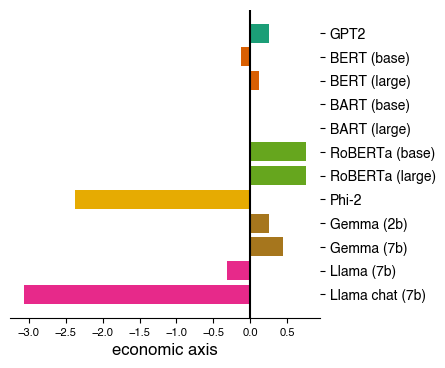

In [85]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: combo_scores[m][0] for m in forward_scores}, metric="economic_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()

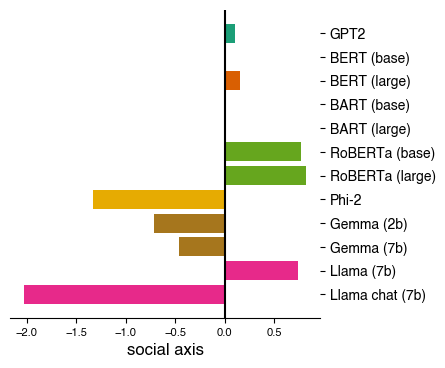

In [86]:
%matplotlib inline
ax = plot_utils.make_horizontal_barplot({m: combo_scores[m][1] for m in forward_scores}, metric="social_score")#, ["gpt2", "bert-base-uncased", "bert-large-uncased"])
plt.show()